<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject: Infinite Money in Roulette (Martingale Betting Strategy)</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/">https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Simulation: A Martingale Betting System

A "martingale" is a betting strategy where, after every loss, your next met is made so that a win will always recover all of previous losses.  In the game of Roulette, a wheel with 38 slots is spun and a ball is placed into the spinning wheel.  As the spinning wheel slows down, the ball will land in one of the 38 slots with equal probability.  Each of the slots are labeled with a number **and** a color.

When you place a bet on the color "red" or "black", **the bet is "1:1" bet**.  A "1:1" bet means you are awarded with $1 for every $1 you bet if you win (plus you retain your original bet) or you lose your entire bet if you lose.

Applying the martingale betting strategy to the game of Roulette would involve the following betting strategy:

- Initially, you bet a small amount (ex: $1.00) that the ball will land on "red".
- A game of roulette is played.  Based on the result of the game:
  - **If the ball lands on red**, you won your bet!  You made $1.00 and can repeat again.
  - **Each time you lose**, you double your bet!  You will initially lose the $1.00, but doubling your bet to $2.00 will make up for that initial loss when you win.  (If you continue to lose, you'll bet $4.00 to make up for the $1 + $2 lost bets, then $8.00 to make up for the $1 + $2 + $4 lost bets, then $16, then $32, and so on.)

The following table outlines this strategy and your total eventual winnings:

| Scenario | Previous Losses | Winning Bet | Total Winnings |
| -------- | --------------: | ------: | -------------: |
| You bet red, and win | -- | $1.00 | +$1.00 |
| You win after losing once | -$1.00 | $2.00 | +$1.00 |
| You win after losing twice | -$3.00 | $4.00 | +$1.00 |
| You win after losing three times | -$7.00 | $8.00 | +$1.00 |
| You win after losing four times | -$15.00 | $16.00 | +$1.00 |
| You win after losing five times | -$31.00 | $32.00 | +$1.00 |
| You win after losing six times | -$63.00 | $64.00 | +$1.00 |
| You win after losing seven times | -$127.00 | $128.00 | +$1.00 |
| ... | ... | ... | +$1.00 |

In the table, you will see that every win will **ALWAYS** result in a total winnings of $1.00 -- even if you just lost 7 or more times in a row!  Proponents of the martingale betting system will tell you that they have mathematically proven way that you will make an **infinite increasing amount of money** so long as you play the game long enough!

In this MicroProject, we will explore this claim and use simulation to play Roulette using this martingale betting system.  Let's nerd out! :)



### Background Knowledge

To finish this MicroProject, we assume you already know:

- All topics covered in *DISCOVERY Module 1: Basics of Data Science with Python* ([review the module here](https://discovery.cs.illinois.edu/learn/))
- Creating a Simple Simulation in Python ([reviewing simulations in Python](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Simple-Simulations-in-Python/))
- Adding Conditionals to Simulations ([reviewing conditionals in Python](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Conditionals-in-Python/))

Let's get started! :)



<hr style="color: #DD3403;">

## Part 1: Simulation of a Martingale Betting Strategy in Roulette

Whenever we work with data from a simulation, the first thing to do is to build the simulation!  To test the martingale betting strategy, let's simulate playing Roulette 1,000,000 times and we will start playing with $100,000 (that's a lot of money)!

### Part 1.1: Simulating the `number` in Roulette Game

Unlike a simple simulation we've done before, we need a few Python variables that track our progress between individual games.  There are two variables that we need to define before we start our simulation:
- `money = 100000` ($100,000), your starting money
- `currentBet = 1` ($1), your current bet size

Each observation in our simulation is one game of Roulette where you bet a `currentBet` amount of money on "red".  The only event in a Roulette game is choosing where among the 38 possible spots that the ball lands: `00`, `0`, `1`, `2`, `3`, ..., `35`, or `36`.
- Challenge #1: How do you want to represent `00`?  *(There's no wrong answer here, but you must make sure to represent `00` in some way.)*
- Store the value of where the Roulette ball lands in the Python variable `number`.

Create a DataFrame `df` that contains the data from a simulation of playing 1,000,000 games of Roulette, making sure to store the `money`, `currentBet`, and `number` variables for each game of Roulette.  *(At this stage, you are not updating the `money` or `currentBet` -- we want to make sure to get the game working first!)*

In [188]:
import pandas as pd
import random

def rgame():
    money = 100000  
    currentBet = 1
    values = []

    for i in range(1000000):  # Simulate 1,000,000 games
        number = random.randint(-1, 36)  # Generate a number between -1 (00) and 36
        values.append({"money": money, "currentBet": currentBet, "number": number})

    df = pd.DataFrame(values)
    return df

df = rgame()



In [189]:
# View your DataFrame
df

,money,currentBet,number
0,100000,1,32
1,100000,1,26
2,100000,1,2
3,100000,1,10
4,100000,1,18
...,...,...,...
999995,100000,1,9
999996,100000,1,8
999997,100000,1,18
999998,100000,1,4


In [190]:
### TEST CASE for Part 1.1: Simulating the `number` in Roulette Game
tada = "\N{PARTY POPPER}"
assert( "df" in vars() ), "Your simulation must be stored in df."
assert( "money" in df ), "Your DataFrame must have the column/variable \"money\"."
assert( "currentBet" in df ), "Your DataFrame must have the column/variable \"currentBet\"."
assert( "number" in df ), "Your DataFrame must have the column/variable \"number\"."
uniqueNumbers = df.number.unique()
assert(len(uniqueNumbers) == 38), "You must have 38 unique values in `number` for the 38 different spots the ball can land. Make sure you are representing 0, 00, and all numbers 1-36"
for i in range(37):
  assert(i in uniqueNumbers), f"Your simulation never had the `number` {i} in any observation.  Make sure that `number` is possible."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 1.2: Adding Each Number's `color` to the Simulation

In Roulette, every spot has both a **number** and a **color**.  On a standard Roulette wheel in the United States, the following table shows the colors for each number, based on the order they appear on the wheel:

| Color | Numbers |
| ----- | ------- |
| red   | 32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, and 3 |
| black | 15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, and 26 |
| green | 0, 00 |

In Python, we can check if a value is in a list of numbers with the `in` keyword.  After you have your value for `number`, you can use the following code to set a value for `color`:

---
```py
if number in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
  color = "red"
elif number in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
  color = "black"
else:
  color = "green"
```
---

Copy your simulation from the previous section into the cell below, and then extend it with the code above to include `color` to your simulation and DataFrame:

In [191]:
def rgame():
    money = 100000  
    currentBet = 1
    values = []

    for i in range(1000000):  
        number = random.randint(-1, 36) 
        if number in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
          color = "red"
        elif number in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
          color = "black"
        else:
          color = "green"
        values.append({"money": money, "currentBet": currentBet, "number": number, "color" : color})

    df = pd.DataFrame(values)
    return df

df = rgame()


In [192]:
# View your DataFrame:
df

,money,currentBet,number,color
0,100000,1,23,red
1,100000,1,7,red
2,100000,1,30,red
3,100000,1,15,black
4,100000,1,28,black
...,...,...,...,...
999995,100000,1,33,black
999996,100000,1,15,black
999997,100000,1,11,black
999998,100000,1,8,black


In [193]:
### TEST CASE for Part 1.2: Adding Each Number's `color` to the Simulation
tada = "\N{PARTY POPPER}"
assert( "df" in vars() ), "Your simulation must be stored in df."
assert( "color" in df ), "Your DataFrame must have the column/variable \"color\"."
assert( len(df.color.unique()) == 3 ), "You must have three unique colors."
for color in ["red", "black", "green"]: assert(color in df.color.unique()), f"The color {color} must be a value for `color`."
assert( abs(len(df[df.color == "black"] ) - len( df[df.color == "red"])) < len(df[df.color == "green"]) ), "Make sure your color mapping is correct (the distribution of red vs. black vs. green you have does not match Roulette)."
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


### Part 1.3: Adding `result` and `nextBet` to your Simulation

With the color of the number of each Roulette game stored in `color`, we can use the `color` variable to determine the result of the game of Roulette.  There are two possible results of a game of Roulette for the purposes of our simulation:

**If the `color` is `"red"`**, you've won! 🎉
- You have won the amount of money you bet, as stored in `currentBet`!
- To represent you winnings, in games where the `color` is `"red"`, set the value of `result` to be equal to your `currentBet`.
- Additionally, set the value of `nextBet` back to be $1.

**If the `color` was NOT `"red"`**, you lost.
- You lost your bet. :(
- To represent you lost, in games where the `color` is NOT `"red"`, set the value of `result` to be equal to the negative value of your `currentBet` (ex: `currentBet * -1`).
- Additionally, set the value of `nextBet` to be **double** the value of your current bet (so your next bet can make up for all your previous losses). 

Copy your simulation from the previous section into the cell below, and then extend it to add both `result` and `nextBet` to your simulation and DataFrame:

In [194]:
def rgame():
    money = 100000  
    currentBet = 1
    values = []

    for i in range(1000000):  
        number = random.randint(-1, 36) 
        if number in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
          color = "red"
        elif number in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
          color = "black"
        else:
          color = "green"
          
        if (color == "red"):
            result = currentBet
            nextBet = 1
        else:
            result = -1 * currentBet
            nextBet = 2 * currentBet
        values.append({"money": money,
                       "currentBet": currentBet,
                       "number": number,
                       "color" : color,
                       "result" : result,
                       "nextBet" : nextBet})

    df = pd.DataFrame(values)
    return df

df = rgame()


In [195]:
# View your DataFrame:
df

,money,currentBet,number,color,result,nextBet
0,100000,1,29,black,-1,2
1,100000,1,26,black,-1,2
2,100000,1,11,black,-1,2
3,100000,1,23,red,1,1
4,100000,1,30,red,1,1
...,...,...,...,...,...,...
999995,100000,1,4,black,-1,2
999996,100000,1,31,black,-1,2
999997,100000,1,22,black,-1,2
999998,100000,1,9,red,1,1


In [196]:
### TEST CASE for Part 1.3: Adding `result` and `nextBet` to your Simulation
tada = "\N{PARTY POPPER}"
assert( "df" in vars() ), "Your simulation must be stored in df."
assert( "nextBet" in df ), "Your DataFrame must have the column/variable \"nextBet\"."
assert( "result" in df ), "Your DataFrame must have the column/variable \"result\"."

uniqueBets = list(df.nextBet.unique())
maxBet = df.nextBet.unique().max()
curBet = 1
for i in range(len(uniqueBets)):
    val = 2 ** i
    if val in uniqueBets:
        uniqueBets.remove(2 ** i)
assert( len(uniqueBets) == 0 ), f"Your `nextBet` contains values that are not valid bets: {uniqueBets}."

spread = (df.currentBet - df.result.abs())
assert(spread.sum() == 0), "The absolute value of the `result` must be the same value as your `currentBet` -- you cannot win/lose more than your current bet."
assert(spread.std() == 0), "The absolute value of the `result` must be the same value as your `currentBet` -- you cannot win/lose more than your current bet."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 1.4: Complete your Simulation

The last step to complete your simulation is to update your money and bet size for the next day.

In your code **AFTER you have recorded your simulation data for a game** (AKA after making your dictionary but before appending your data), we need to update our global variables:
1. `money`: The value stored in `money` must be updated by adding the `result` of the Roulette game to the current value of `money`.  Since `result` is negative when we lose money, adding a negative value will make our `money` smaller (and when our `result` is positive, our `money` will grow).
2. `currentBet`: The value stored in `currentBet` must be updated to be the value stored in `nextBet`.

These two tasks will complete the game and track the amount of money we've made --  copy your simulation from the previous section into the cell below and complete your simulation by finishing the final two steps outlined above! :)

In [197]:
def rgame():
    money = 100000  
    currentBet = 1
    values = []

    for i in range(1000000):  
        number = random.randint(-1, 36) 
        if number in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
          color = "red"
        elif number in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
          color = "black"
        else:
          color = "green"
          
        if (color == "red"):
            result = currentBet
            nextBet = 1
        else:
            result = -currentBet
            nextBet = 2 * currentBet
            
        values.append({"money": money,
                       "currentBet": currentBet,
                       "number": number,
                       "color" : color,
                       "result" : result,
                       "nextBet" : nextBet})
        money += result
        currentBet = nextBet

    df = pd.DataFrame(values)
    return df

df = rgame()


In [198]:
# View your DataFrame:

df

,money,currentBet,number,color,result,nextBet
0,100000,1,32,red,1,1
1,100001,1,22,black,-1,2
2,100000,2,16,red,2,1
3,100002,1,36,red,1,1
4,100003,1,30,red,1,1
...,...,...,...,...,...,...
999995,574282,1,11,black,-1,2
999996,574281,2,1,red,2,1
999997,574283,1,33,black,-1,2
999998,574282,2,24,black,-2,4


In [199]:
### TEST CASE for Part 1.4: Complete your Simulation
tada = "\N{PARTY POPPER}"

assert( "df" in vars() ), "Your simulation must be stored in df."
for col in ["money", "currentBet", "result", "color", "number", "nextBet"]: assert(col in df), f"Your DataFrame must have the column/variable `{col}`."
assert( df.money.values[0] == 100000 ), "Your starting money must be $100,000."
assert( df.currentBet.values[0] == 1 ), "Your starting bet must be $1."
assert( len(df) == 1000000 ), "Your simulation must be of exactly 1,000,000 games."

uniqueBets = list(df.currentBet.unique())
maxBet = df.currentBet.unique().max()
curBet = 1
for i in range(len(uniqueBets)):
    val = 2 ** i
    if val in uniqueBets:
        uniqueBets.remove(2 ** i)
assert( len(uniqueBets) == 0 ), f"Your `currentBet` contains values that are not valid bets: {uniqueBets}."

redCount = len(df[df.color == "red"])
assert(abs(df.money.max() - redCount - 100000) < 10), "You must only make $1 every time `red` occurs, even in a streak."
print(f"{tada} All tests passed! {tada}")

if len(df[df.money < 0]) == 0: print("\n⚠️ Your simulation was very lucky and you never lost money. ⚠️ \n- To make the next section easier to understand, we STRONGLY recommend you re-run your simulation (and this test case) until this warning goes away.\n- If you repeatably get this warning, there is something wrong with your simulation (the chance of this warning is less than ~5%).")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Analysis of Infinite Money

The following code creates a line plot using `df.plot.line` and uses `money` as the `y`-axis value to create a plot of our current money:

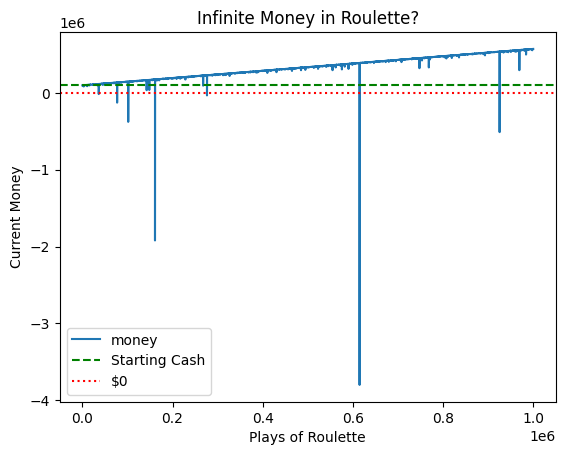

In [200]:
df.plot.line(y="money", xlabel="Plays of Roulette", ylabel="Current Money", title="Infinite Money in Roulette?")

# Add a red line at y=0 ($0) and a green line at your starting money (y=$100,000)
import matplotlib.pyplot as plt 
plt.axhline(y=100000, color="green", linestyle="dashed", label="Starting Cash") 
plt.axhline(y=0, color="red", linestyle="dotted", label="$0") 
plt.legend()

### Part 2.1: Negative Money?

A casino requires you to have money to place a bet -- if your money ever went below $0, you couldn't make the bet.  From your 1,000,000 games, create a DataFrame of all games with a negative starting balance -- store that as `df_negativeBalance`:

In [201]:
# Find all rows with a negative starting balance:
df_negativeBalance = df[df.money.values < 0]
df_negativeBalance

,money,currentBet,number,color,result,nextBet
36448,-13679,131072,34,red,131072,1
77197,-125458,262144,1,red,262144,1
101805,-113899,262144,-1,green,-262144,524288
101806,-376043,524288,21,red,524288,1
161161,-85775,262144,35,black,-262144,524288
161162,-347919,524288,31,black,-524288,1048576
161163,-872207,1048576,0,green,-1048576,2097152
161164,-1920783,2097152,34,red,2097152,1
276471,-31212,262144,21,red,262144,1
614879,-132991,524288,31,black,-524288,1048576


### Part 2.2: Required Bankroll

A "bankroll" is the amount of money you have available to play at a casino.

The bankroll you would be required to have at the casino (on top of the original $100,000) would be the **absolute value** of the greatest amount of debt you were in during the simulation (which is the smallest value in `money`).

Store the "required bankroll" that you need in the variable `bankroll_required`:

(Note: Do not factor in your original $100,000 to the "required bankroll".)

In [202]:
# Find the additional money you would have needed to have to bankrolled for 1,000,000 games of Roulette:
bankroll_required = abs(df_negativeBalance.money.min())
bankroll_required

np.int64(3803007)

In [203]:
### TEST CASE for Part 2: Analysis of Infinite Money
tada = "\N{PARTY POPPER}"

assert( "df_negativeBalance" in vars() )
assert( len(df_negativeBalance) == len(df) - len(df[df.money >= 0]) ), "Your df_negativeBalance does not contain all of the negative balances."

assert( "bankroll_required" in vars() )
assert( bankroll_required >= 0 or (bankroll_required < 0 and df.money.min() > 0) ), "`bankroll_required` must be positive."
assert( bankroll_required == max(0, -df.money.min()) or bankroll_required == -df.money.min() ), "Your `bankroll_required` is incorrect."

def formatMoney(value):
  value = round(value, 2)
  return "${:,}".format(value)

import locale
locale.setlocale( locale.LC_ALL, '' )

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}") 
print()
print(f"On top of your initial $100,000, you would have needed an ADDITIONAL {formatMoney(bankroll_required)} to be able to use this strategy.")
if bankroll_required > 1000000:
  print(f"...that's a lot of money! (!!)")
if bankroll_required > 0:
  print(f"...in addition, every additional game you play has a chance to double the needed bankroll (to {formatMoney(bankroll_required * 2)}, then {formatMoney(bankroll_required * 4)}, etc).")

🎉 All tests passed! 🎉

On top of your initial $100,000, you would have needed an ADDITIONAL $3,803,007 to be able to use this strategy.
...that's a lot of money! (!!)
...in addition, every additional game you play has a chance to double the needed bankroll (to $7,606,014, then $15,212,028, etc).


<hr style="color: #DD3403;">

## Part 3: Table Limits

If you are a multi-millionaire, the bankroll you need may not be an issue and -- after 1,000,000 games -- you have still won about ~$470,000 *(you're expected to win about 18/38 times, each win winning $1)*.  No casino could let you win like this!!

One feature of all games of Roulette is that there will always be a "table limit".  A "table limit" is the maximum bet you can make on any one spin of Roulette.  In our simulation, our table limit is $10,000.


### Part 3.1: Updated Simulation with Table Limits

Return to Part 1.4 and copy your simulation and extend it to include table limits by doing the following:
- When setting the `currentBet` near the end of your for-loop, check if the value of `nextBet` is greater than $10,000.
- If `nextBet` is larger than $10,000, set `currentBet` equal to $10,000 instead of `nextBet`.
- Otherwise, set `currentBet` equal to `nextBet` as normal.

Create your simulation with table limits below:

In [204]:
def rgame():
    money = 100000  
    currentBet = 1
    values = []

    for i in range(1000000):  
        number = random.randint(-1, 36) 
        if number in [32, 19, 21, 25, 34, 27, 36, 30, 23, 5, 16, 1, 14, 9, 18, 7, 12, 3]:
          color = "red"
        elif number in [15, 4, 2, 17, 6, 13, 11, 8, 10, 24, 33, 20, 31, 22, 29, 28, 35, 26]:
          color = "black"
        else:
          color = "green"
          
        if (color == "red"):
            result = currentBet
            nextBet = 1
        else:
            result = -currentBet
            nextBet = 2 * currentBet
            
        if (currentBet > 10000): currentBet = 10000
            
        values.append({"money": money,
                       "currentBet": currentBet,
                       "number": number,
                       "color" : color,
                       "result" : result,
                       "nextBet" : nextBet})
        money += result
        currentBet = nextBet

    df = pd.DataFrame(values)
    return df

df = rgame()

In [205]:
# View your DataFrame:
df

,money,currentBet,number,color,result,nextBet
0,100000,1,32,red,1,1
1,100001,1,32,red,1,1
2,100002,1,23,red,1,1
3,100003,1,34,red,1,1
4,100004,1,-1,green,-1,2
...,...,...,...,...,...,...
999995,574523,8,23,red,8,1
999996,574531,1,11,black,-1,2
999997,574530,2,10,black,-2,4
999998,574528,4,21,red,4,1


In [206]:
### TEST CASE for Part 3.1: Updated Simulation with Table Limits
tada = "\N{PARTY POPPER}"

assert( "df" in vars() ), "Your simulation must be stored in df."

assert( "money" in df ), "Your DataFrame must have the column/variable \"money\"."
assert( "currentBet" in df ), "Your DataFrame must have the column/variable \"currentBet\"."
assert( "result" in df ), "Your DataFrame must have the column/variable \"result\"."
assert( "color" in df ), "Your DataFrame must have the column/variable \"color\"."
assert( "number" in df ), "Your DataFrame must have the column/variable \"number\"."

assert( df.money.values[0] == 100000 ), "Your starting money must be $100,000."
assert( df.currentBet.values[0] == 1 ), "Your starting bet must be $1."
assert( len(df) == 1000000 ), "Your simulation must be of exactly 1,000,000 games."

uniqueBets = list(df.currentBet.unique())
maxBet = df.currentBet.unique().max()
curBet = 1
for i in range(len(uniqueBets)):
    val = 2 ** i
    if val in uniqueBets and val < 10000:
        uniqueBets.remove(2 ** i)

uniqueBets.remove(10000)
assert( len(uniqueBets) == 0 ), f"Your `bets` contains values that are not valid bets: {uniqueBets}."

tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


### Part 3.2: Table Limits Visualization

Let's look at a data visualization of the simulation when table limits are put in place:

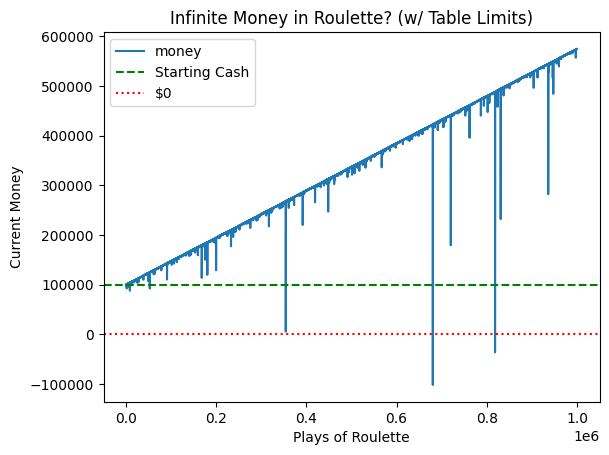

In [214]:
df.plot.line(y="money", xlabel="Plays of Roulette", ylabel="Current Money", title="Infinite Money in Roulette? (w/ Table Limits)")

# Adds a red line at y=0 ($0) and a green line at your starting money (y=$100,000)
import matplotlib.pyplot as plt 
plt.axhline(y=100000, color="green", linestyle="dashed", label="Starting Cash")
plt.axhline(y=0, color="red", linestyle="dotted", label="$0")
plt.legend()

### Part 3.3: Finding the Total Money Lost

Calculate the **total money lost** (as a positive amount of money lost) after playing all 1,000,000 simulated games when table limits are used.  Store your total money lost in the variable `totalLoss`.

To calculate this, remember that your simulation maintains the Python variable `money` that stores the current amount of money you have.  After playing the game with table limits, this value of `money` is negative since you are in debt.
- To calculate loss based on debt, your loss is the negation of the amount of debt you have (`-money`).  *(Ex: The negation of -$500,000 is -(-$500,000) or "a loss of $500,000".)*
- In addition to the debt you racked up, you also loss all of your initial $100,000.  Make sure to add that initial $100,000 to your calculation of `totalLoss`.

In [229]:
totalLoss = 100000 - df.iloc[-1].money - df.iloc[-1].result
totalLoss

np.int64(-474533)

In [230]:
### TEST CASE for Part 3.2: Analysis of Losses in Games with Table Limits
tada = "\N{PARTY POPPER}"

assert( "totalLoss" in vars() ), "Make sure your total money lost is stored in `totalLoss`."
assert( (r := abs(totalLoss - (1e5 - df.iloc[-1].money - df["result"].tail(n=1).values[0]))) <= 2 * abs(df.iloc[-1].result)  ), "Your `totalLoss` is incorrect. Remember that your total money lost is the money amount at the end of all your games in addition to your original $100,000."

def formatMoney(value):
  value = round(value, 2)
  return "${:,}".format(value)

tada = "\N{PARTY POPPER}"
if (r != 0):
  print("⚠️ Your answer for `totalLoss` is close, but not exactly correct. ⚠️")
  print("- It looks like you calculated `totalLoss` by taking the `money` before the final game in your calculation of `totalLoss`.")
  print("- You did not account for the `result` of the very last game. Make sure to include the final game's result in your calculation of `totalLoss`.")
else:
  print(f"{tada} All basic tests passed! {tada}")
  if totalLoss > 0:
    print()
    print(f"You turned your initial $100,000 into an additional {formatMoney(-(100000 - totalLoss))} of debt. (!!)")

🎉 All basic tests passed! 🎉


### Part 3.4: Reflection

The martingale betting strategy is, in theory, **not a completely crazy idea** -- your initial data visualization showed you had a slow but steady increase in money when using the martingale system.

However, **as soon as table limits are introduced**, you are prevented from making massive bets to recover from streaks of bad luck, and the strategy completely falls apart and debt stacks up quickly!

Congratulations on writing quite a complex simulation!! 🎉

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/infinite-money-in-roulette-martingale/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉